# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
merged_data[merged_data.duplicated]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_data = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
all_duplicate_mice_data.sort_values(by=["Mouse ID", "Timepoint"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_data.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
675,c402,Stelasyn,Female,1,27,25,58.269889,2
574,a897,Placebo,Male,7,28,30,59.916934,3
603,b559,Naftisol,Male,20,26,10,48.036432,0
699,c757,Placebo,Male,9,27,10,49.219317,0
1787,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_data["Mouse ID"].nunique()
print(num_cleaned_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics = cleaned_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_single_line = cleaned_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

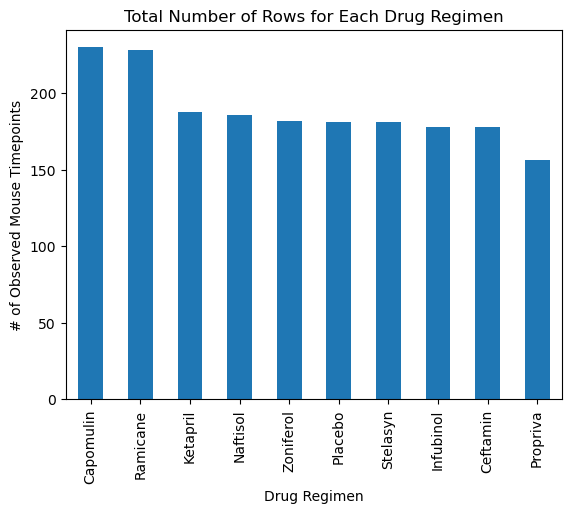

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind="bar")

# Set the plot title and labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


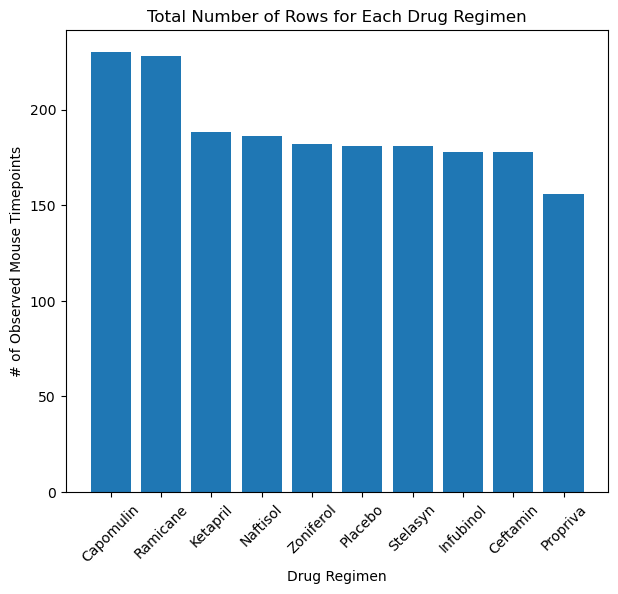

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Pyplot
plt.figure(figsize=(7, 6))
plt.bar(regimen_counts.index, regimen_counts)

# Set the plot title and labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

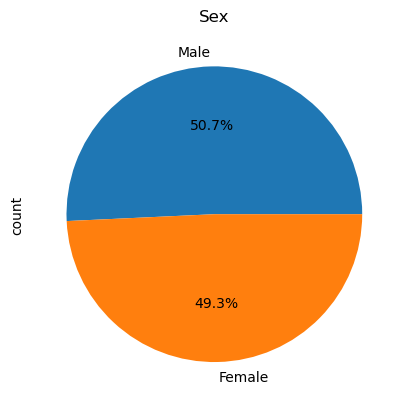

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=0)

# Set the plot title
plt.title("Sex")

# Display the plot
plt.show()

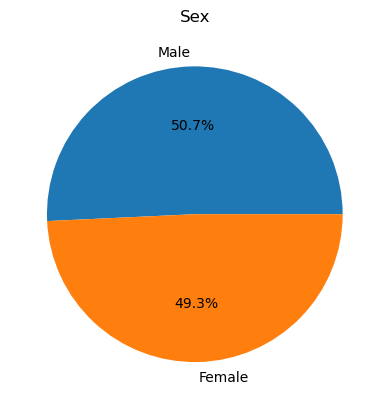

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", startangle=0)
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Create a DataFrame with Mouse ID and corresponding last timepoint
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints_df, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(target_regimens)]
final_tumor_volume_df = final_tumor_volume_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume_df.reset_index(drop=True, inplace=True)
final_tumor_volume_df


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each regimen
for regimen in target_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for each regimen
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Display potential outliers
    print(f"{regimen}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


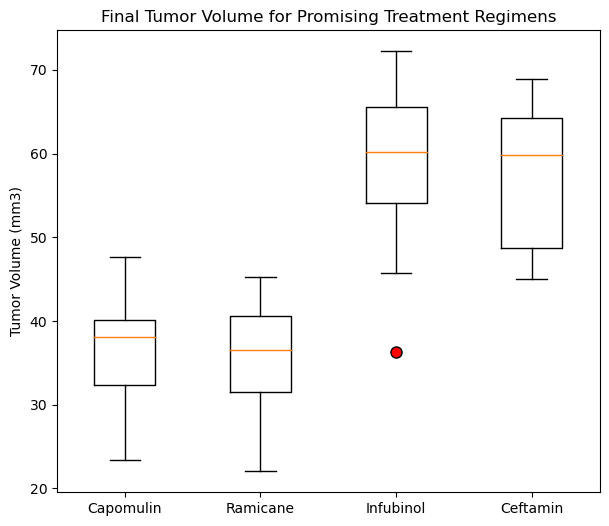

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
plt.figure(figsize=(7, 6))
plt.boxplot(tumor_vol_data, labels=target_regimens, flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

# Set the plot title and labels
plt.title('Final Tumor Volume for Promising Treatment Regimens')
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

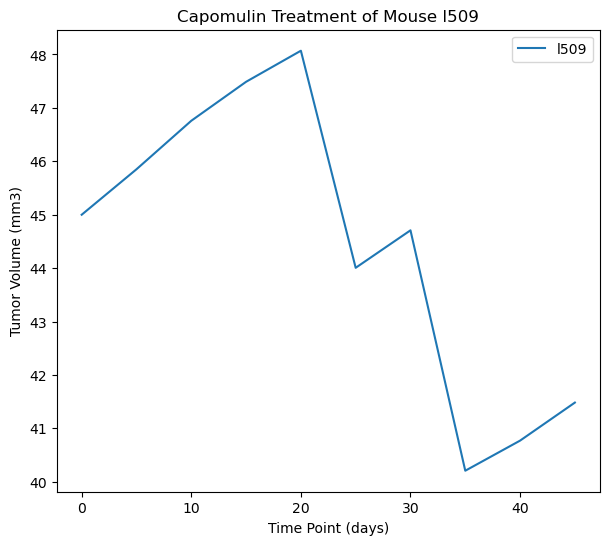

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Single mouse treated with Capomulin
selected_mouse = "l509"
capomulin_data_single_mouse = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == selected_mouse)]

# Create a line plot
plt.figure(figsize=(7, 6))
plt.plot(capomulin_data_single_mouse["Timepoint"], capomulin_data_single_mouse["Tumor Volume (mm3)"], label=selected_mouse)

# Set the plot title and labels
plt.title(f"Capomulin Treatment of Mouse {selected_mouse}")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

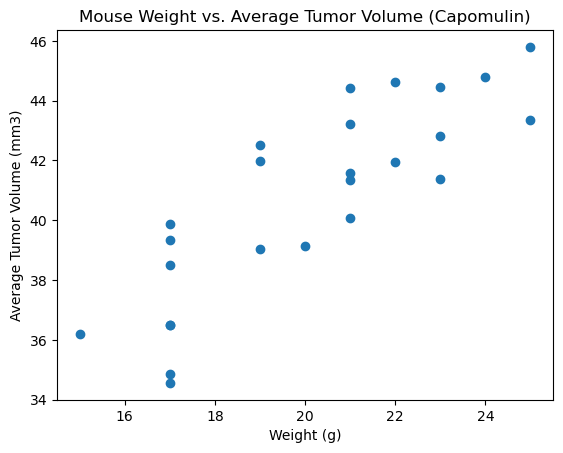

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter_plot = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
plt.figure()
plt.scatter(capomulin_scatter_plot['Weight (g)'], capomulin_scatter_plot['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

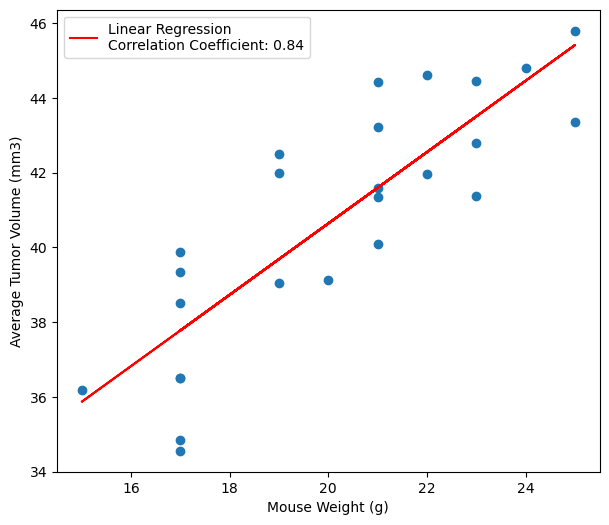

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge with the mouse metadata to get mouse weight
merged_data_capomulin = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")

# Calculate the correlation coefficient
correlation_coefficient = merged_data_capomulin["Weight (g)"].corr(merged_data_capomulin["Tumor Volume (mm3)"])

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(merged_data_capomulin["Weight (g)"], merged_data_capomulin["Tumor Volume (mm3)"])

# Create a scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(merged_data_capomulin["Weight (g)"], merged_data_capomulin["Tumor Volume (mm3)"])

# Plot the linear regression line
regression_line = slope * merged_data_capomulin["Weight (g)"] + intercept
plt.plot(merged_data_capomulin["Weight (g)"], regression_line, color='r', label=f'Linear Regression\nCorrelation Coefficient: {correlation_coefficient:.2f}')

# Set the plot title and labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()
